In [1]:
# invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the data
df_train = pd.read_csv('C:\\Users\\TejYadav\\Desktop\\TF\Housing_prices\\datasets_33080_1320127_CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
df_train['selling_price'].describe()

count    4.340000e+03
mean     5.041273e+05
std      5.785487e+05
min      2.000000e+04
25%      2.087498e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64

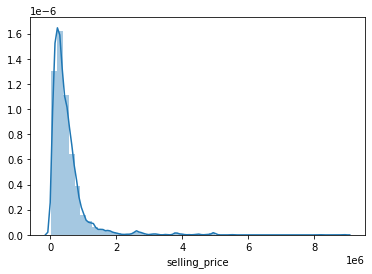

In [7]:
#histogram
sns.distplot(df_train['selling_price']);

In [9]:
#skewness and kurtosis
print("Skewness: %f" % df_train['selling_price'].skew())
print("Kurtosis: %f" % df_train['selling_price'].kurt())

Skewness: 4.892021
Kurtosis: 37.087543


It shows success probability is 95.107979%.

In [10]:
# Relationship with numerical variables

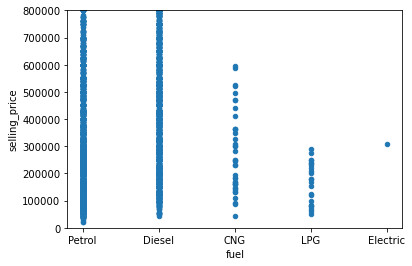

In [17]:
var = 'fuel'
data = pd.concat([df_train['selling_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,800000));

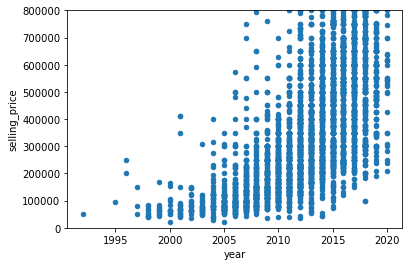

In [14]:
var = 'year'
data = pd.concat([df_train['selling_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,800000));

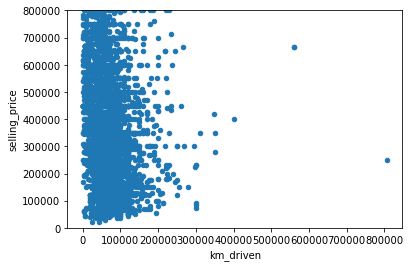

In [15]:
var = 'km_driven'
data = pd.concat([df_train['selling_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,800000));

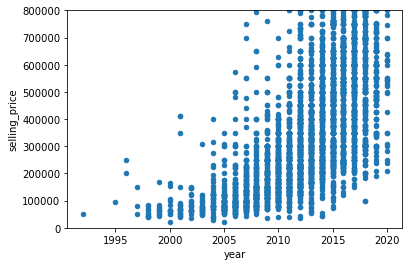

In [20]:
#scatter plot year/saleprice
var = 'year'
data = pd.concat([df_train['selling_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='selling_price', ylim=(0,800000));

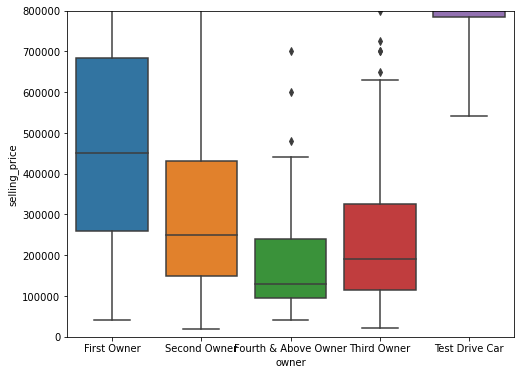

In [21]:
# Relationship with categorical variable
#box plot overallqual/saleprice
var = 'owner'
data = pd.concat([df_train['selling_price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0, ymax=800000);

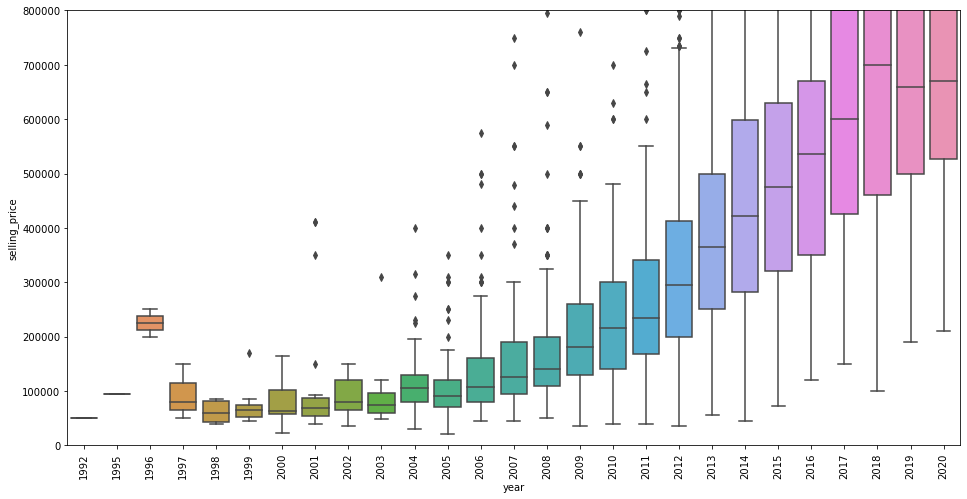

In [22]:
var = 'year'
data = pd.concat([df_train['selling_price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="selling_price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

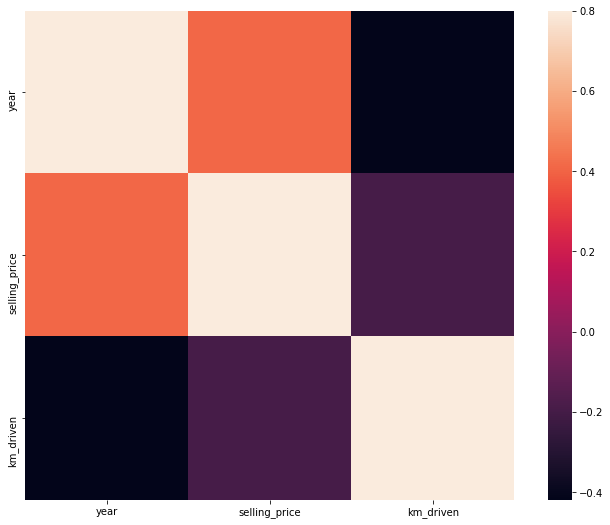

In [23]:
# Correlation matrix (heatmap style)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

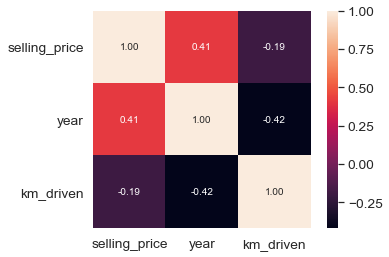

In [24]:
# 'SellingPrice' correlation matrix (zoomed heatmap style)
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'selling_price')['selling_price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

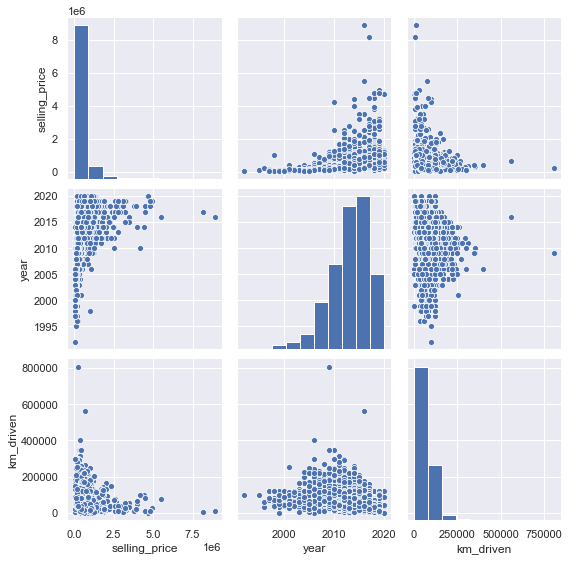

In [26]:
#scatterplot
sns.set()
cols = ['selling_price', 'name', 'year', 'km_driven', 'fuel', 'seller_type','transmission', 'owner']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [27]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
owner,0,0.0
transmission,0,0.0
seller_type,0,0.0
fuel,0,0.0
km_driven,0,0.0
selling_price,0,0.0
year,0,0.0
name,0,0.0


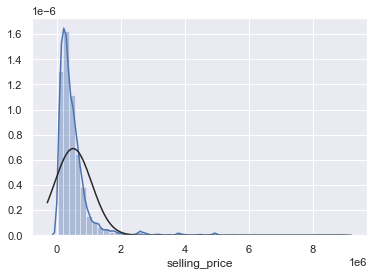

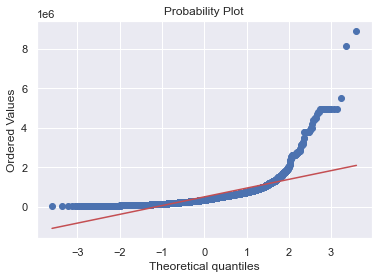

In [28]:
#histogram and normal probability plot
sns.distplot(df_train['selling_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['selling_price'], plot=plt)

In [29]:
#applying log transformation
df_train['selling_price'] = np.log(df_train['selling_price'])

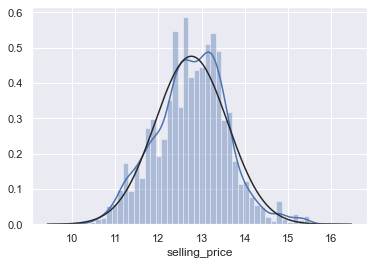

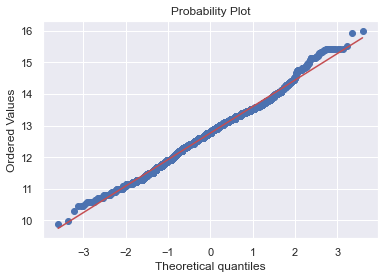

In [30]:
#transformed histogram and normal probability plot
sns.distplot(df_train['selling_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['selling_price'], plot=plt)

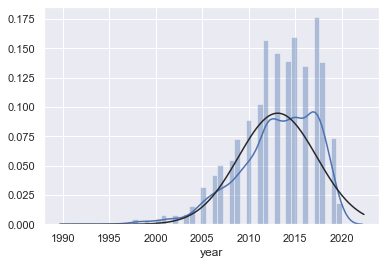

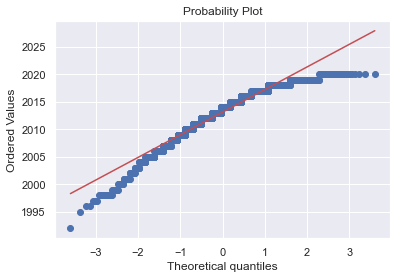

In [31]:
#histogram and normal probability plot
sns.distplot(df_train['year'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['year'], plot=plt)

In [32]:
#data transformation
df_train['year'] = np.log(df_train['year'])

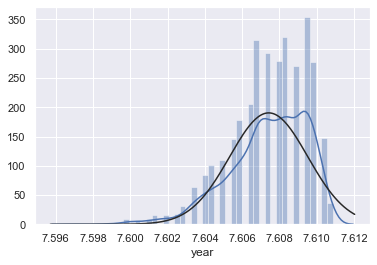

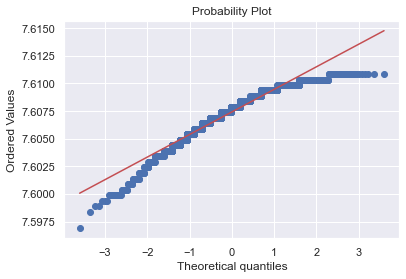

In [33]:
#transformed histogram and normal probability plot
sns.distplot(df_train['year'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['year'], plot=plt)

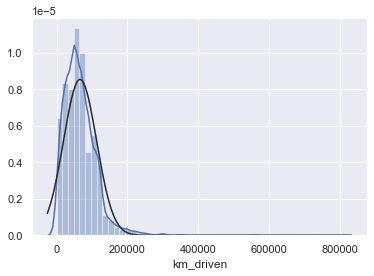

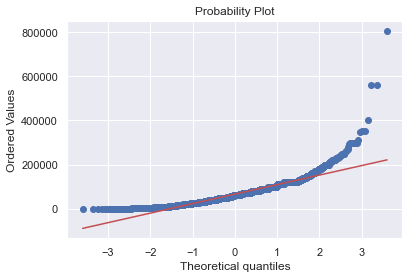

In [34]:
#histogram and normal probability plot
sns.distplot(df_train['km_driven'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['km_driven'], plot=plt)

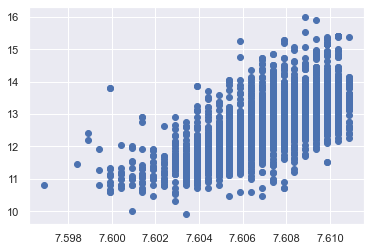

In [39]:
#scatter plot
plt.scatter(df_train['year'], df_train['selling_price']);

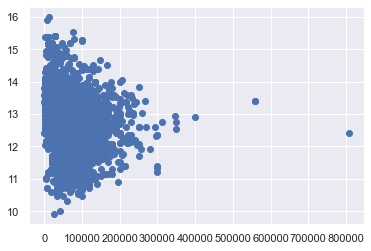

In [42]:
#scatter plot
plt.scatter(df_train[df_train['km_driven']>0]['km_driven'], df_train[df_train['km_driven']>0]['selling_price']);

In [45]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [50]:
df_train.head()

,year,selling_price,km_driven,transmission,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,...,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,7.604396,11.002100,70000,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,7.604396,11.813030,50000,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
2,7.606885,13.304685,100000,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,7.609367,12.429216,46000,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,7.607878,13.017003,141000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [25]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')